In [ ]:
## Project Title: Hyperparameter Fine Tuning for MLP on UCI Adult Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [ ]:
# Importing Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn .neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
adult = pd.read_csv("/content/adult.data", header = None)
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


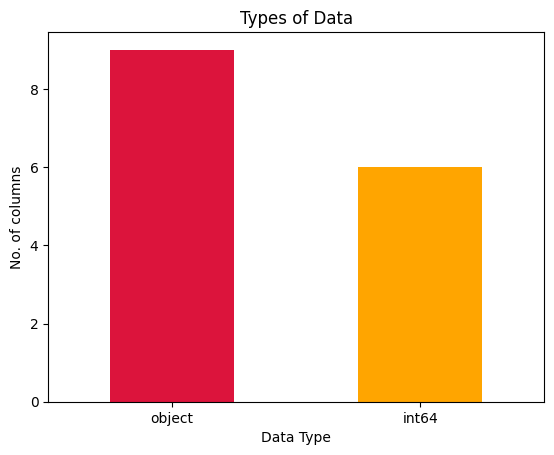

In [ ]:
adult.dtypes.value_counts().plot(kind = 'bar', title = 'Types of Data', xlabel="Data Type", ylabel = "No. of columns", rot = 0, color= ["crimson","orange"])
plt.show()

In [ ]:
# Segragation of columns
cat_cols = []
num_cols = []
for i in adult.columns:
  if adult[i].dtype =="O":
    cat_cols.append(i)
  else:
    num_cols.append(i)

In [ ]:
# Preprocessing
# Preprocessing
encoder=OneHotEncoder(sparse_output=False)
for i in cat_cols:
  adult[i]=encoder.fit_transform(adult[i].values.reshape(-1,1))

# Reset index and drop the existing 'index' or 'level_0' column
adult = adult.reset_index(drop=True)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(adult, adult[14], test_size = 0.10, train_size = 0.90, random_state =0)
X_train.pop(14)
X_test.pop(14)

,14
22278,0.0
8950,0.0
7838,0.0
16505,0.0
19140,0.0
...,...
8955,0.0
7273,0.0
6269,0.0
3760,0.0


In [ ]:
# Multilayer Perceptron
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
clf = MLPClassifier(random_state = 1, max_iter = 300).fit(X_train, y_train)

In [ ]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

# Accuracy on train dataset
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)
# Accuracy on test dataset
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.9699109610070618

In [ ]:
search_space = {
    "activation":["relu", "tanh"],
    "solver":["sgd","adam"],
    "learning_rate":["invscaling","constant"]
    }

In [ ]:
gs = GridSearchCV(MLPClassifier(),search_space)
gs.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['invscaling', 'constant'],
                         'solver': ['sgd', 'adam']})

In [ ]:
gs.best_score_

0.971505596372854

In [ ]:
gs.best_params_

{'activation': 'relu', 'learning_rate': 'invscaling', 'solver': 'adam'}

In [ ]:
# RandomSearchCV
search_space ={
    "activation":["relu", "tanh","identity","logistic"],
    "solver":["sgd","adam","lbfgs"],
    "learning_rate":["invscaling","constant","adaptive"],
    "early_stopping":[True,False]
}

In [ ]:
ps = RandomizedSearchCV(MLPClassifier(),search_space)
ps.fit(X_train, y_train)

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'identity', 'logistic'],
                                        'early_stopping': [True, False],
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']})

In [ ]:
ps.best_score_

0.971505596372854

In [ ]:
ps.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'early_stopping': True,
 'activation': 'identity'}

In [ ]:
# Final Model
clf = MLPClassifier(activation ="relu", learning_rate="constant",solver="adam")
clf.fit(X_train, y_train)

MLPClassifier()

In [ ]:
# Validating the model
# Predictions from the model
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [ ]:
# Accuracy on the train dataset
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)
# Accuracy on the test dataset
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.9699109610070618